In [101]:
import textwrap

import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from rho_plus.util import spread as rho_spread
from rho_plus.color_util import contrast_with
import rho_plus as rp
from rho_plus.matplotlib_tweaks import *

IS_DARK = True
theme, cs = rp.mpl_setup(IS_DARK)
rp.panel_setup(IS_DARK)

dow = sns.load_dataset('dowjones')

<Axes: xlabel='Date', ylabel='Price'>

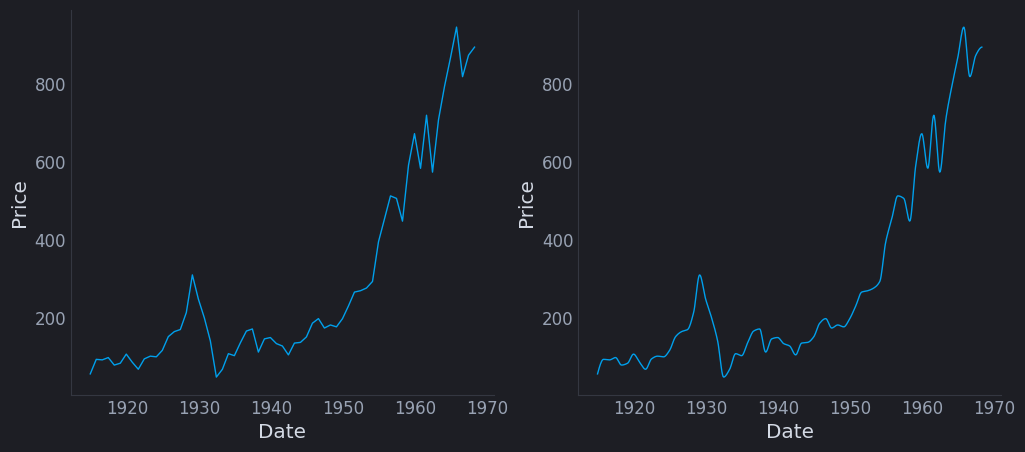

In [102]:
import scipy.interpolate as interp
import numpy as np

def smooth_straight_lines(ax=None, resample_factor=10):
    if ax is None:
        ax = plt.gca()

    for line in ax.lines:
        pts = ax.transData.inverted().transform(line.get_xydata())

        xx = np.linspace(pts[:, 0].min(), pts[:, 0].max(), len(pts) * resample_factor)
        spl = interp.PchipInterpolator(pts[:, 0], pts[:, 1])
        yy = spl(xx)

        new_x, new_y = ax.transData.transform(np.vstack([xx, yy]).T).T

        line.set_xdata(new_x)
        line.set_ydata(new_y)

    return ax

subs = dow.iloc[::10]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.lineplot(subs, x='Date', y='Price', lw=1, ax=ax1)
sns.lineplot(subs, x='Date', y='Price', lw=1, ax=ax2)
smooth_straight_lines()

<Axes: >

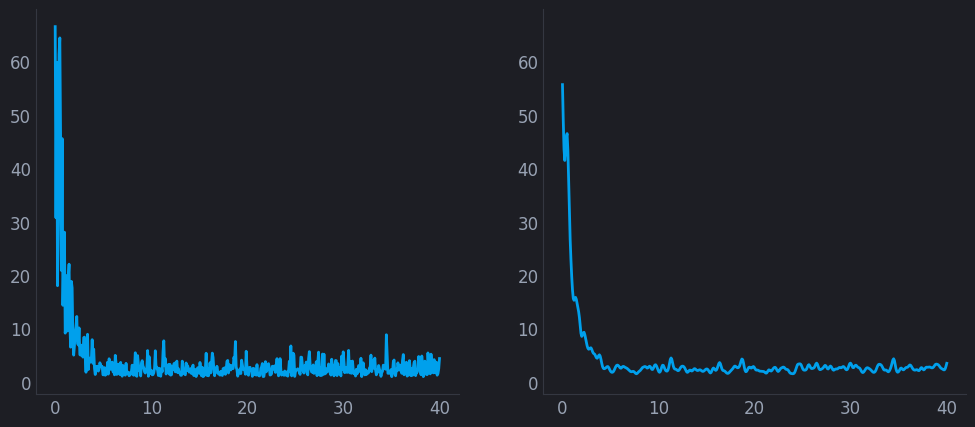

In [103]:
import scipy.interpolate as interp
import numpy as np

def smooth_noisy_lines(ax=None, beta=14):
    if ax is None:
        ax = plt.gca()

    for line in ax.lines:
        pts = ax.transData.inverted().transform(line.get_xydata())

        xx = pts[:, 0]
        M = min(11, len(pts) - (len(pts) % 2))
        window = np.kaiser(M, beta)
        window /= np.sum(window)
        pad_start = (M - 1) // 2
        pad_end = (M - 1) // 2
        yy = np.convolve(np.pad(pts[:, 1], (pad_start, pad_end), 'edge'), window, mode='valid')

        new_x, new_y = ax.transData.transform(np.vstack([xx, yy]).T).T

        line.set_xdata(new_x)
        line.set_ydata(new_y)

    return ax

loss_xx = np.linspace(0, 40, 500)
loss_yy = np.exp(3 - loss_xx) + 1
loss_yy += np.abs(np.random.randn(len(loss_xx))) * loss_yy * 2
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.plot(loss_xx, loss_yy)
ax2.plot(loss_xx, loss_yy)
smooth_noisy_lines(beta=8)

In [96]:
l = ax1.lines[0]

l.get_linewidth()

2.0

In [98]:
ax1.transData.transform(l.get_xydata())

array([[169.21487603, 172.86140718],
       [169.98501135, 300.59267677],
       [170.75514666, 316.69700919],
       [171.52528197, 422.5       ],
       [172.29541728, 277.11206694],
       [173.06555259, 217.98998994],
       [173.8356879 , 224.52688409],
       [174.60582322, 176.40768148],
       [175.37595853, 182.01799582],
       [176.14609384, 326.97017724],
       [176.91622915, 348.29047266],
       [177.68636446, 176.40388402],
       [178.45649978, 163.37854634],
       [179.22663509, 153.02603416],
       [179.9967704 , 164.21616001],
       [180.76690571, 112.54964938],
       [181.53704102, 185.02982526],
       [182.30717634,  97.66935473],
       [183.07731165, 107.5916773 ],
       [183.84744696, 115.89158439],
       [184.61758227, 120.75318591],
       [185.38771758, 137.60528471],
       [186.1578529 , 152.39098344],
       [186.92798821, 144.09021958],
       [187.69812352,  86.45782445],
       [188.46825883,  87.0103828 ],
       [189.23839414,  92.14798954],
 